In [1]:
suppressMessages(library(ArchR))
library(parallel)
library(rhdf5)
library(SingleCellExperiment)
library(SeuratDisk)
library(Seurat)
library(cowplot)
library(here)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


here() starts at /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq


Attaching package: ‘here’


The following object is masked from ‘package:plyr’:

    here




In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = round(parallel::detectCores()*1/4))
#addArchRThreads(threads = 1)

##################################
### load mm10 ArchR genome ###

addArchRGenome("mm10")


Setting default number of Parallel threads to 2.

Setting default genome to Mm10.



In [3]:
#neuron ArchRProject
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'Mouse_scATAC_DorsalHorn_neuron2')
proj = loadArchRProject(ARCHDIR)
proj


Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_neuron2 
samples(12): Mouse_DH_SEA2253A60 Mouse_DH_SEA2253A61 ...
  Mouse_DH_SEA2253A69 Mouse_DH_SEA2253A68
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(39): Sample TSSEnrichment ...
  predictedGroup_RNA2ATAC_clustertype
  predictedScore_RNA2ATAC_clustertype
numberOfCells(1): 20591
medianTSS(1): 20.626
medianFrags(1): 25740

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_neuron 
samples(12): Mouse_DH_SEA2253A61 Mouse_DH_SEA2253A60 ...
  Mouse_DH_SEA2253A68 Mouse_DH_SEA2253A64
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(31): Sample TSSEnrichment ...
  predictedScore_RNA2ATACCo ClustersX20
numberOfCells(1): 39059
medianTSS(1): 18.496
medianFrags(1): 30306

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a1e57ce717e2-Date-2023-01-31_Time-19-00-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a1e57ce717e2-Date-2023-01-31_Time-19-00-02.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a1e5699a26e6-Date-2023-01-31_Time-19-00-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a1e5699a26e6-Date-2023-01-31_Time-19-00-46.log



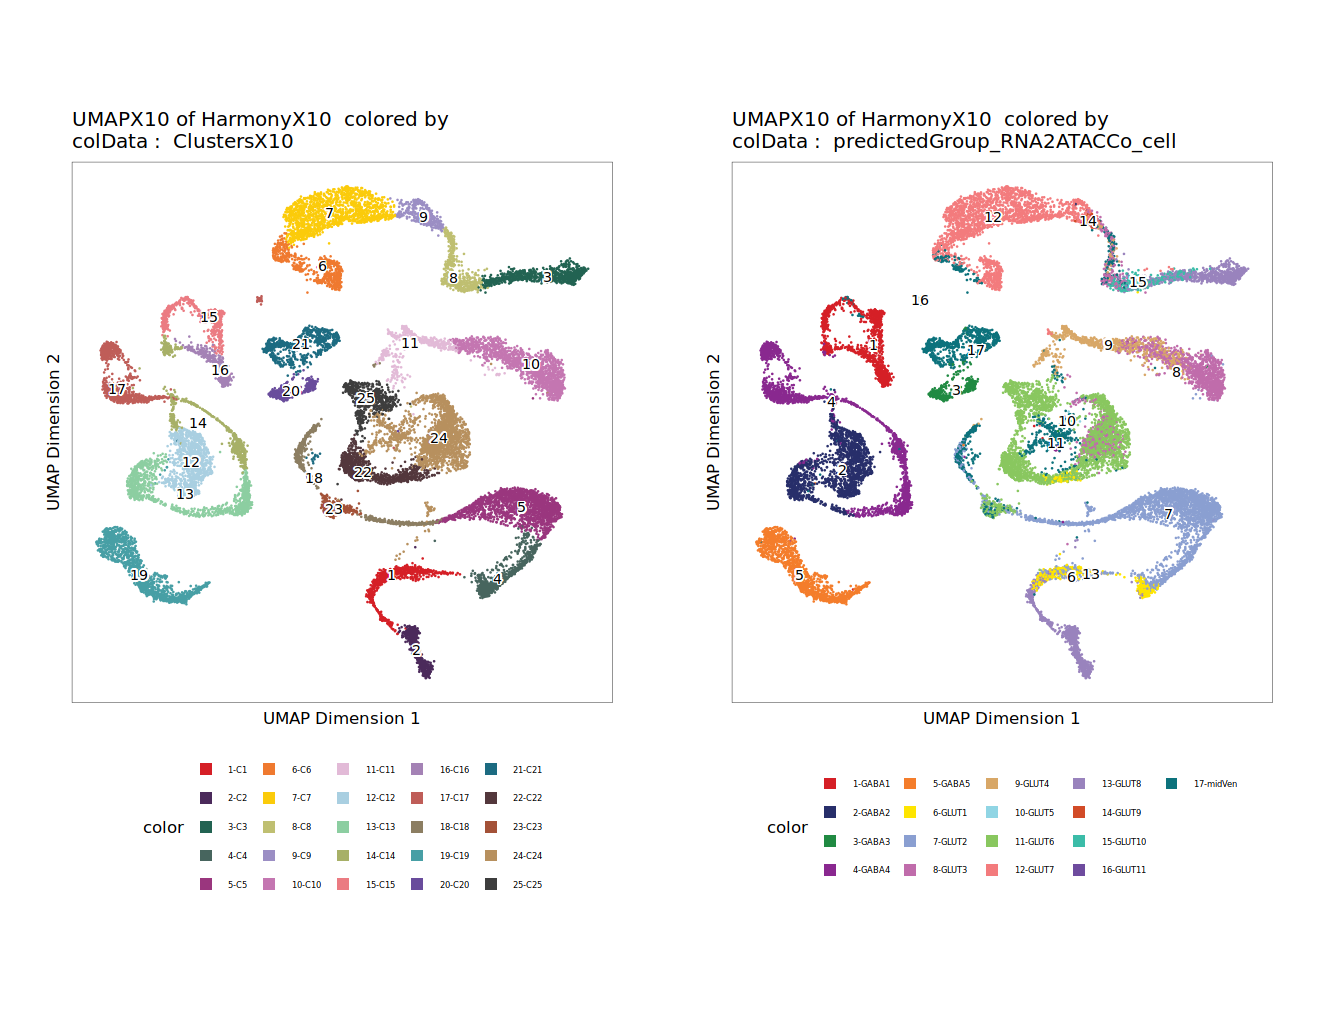

In [4]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX10", embedding = "UMAPX10")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo_cell", embedding = "UMAPX10")
ggAlignPlots(p1, p2, type = "h")

In [ ]:
p1 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "ClustersX20", embedding = "UMAPX20")
p2 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX20")
ggAlignPlots(p1, p2, type = "h")

In [ ]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX10")
# proj <- addImputeWeights(proj, reducedDims = "HarmonyX20")

In [4]:
head(getCellColData(proj))
class(getCellColData(proj))

DataFrame with 6 rows and 39 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GCTTTAGGATCGTAAC Mouse_DH_SEA2253A58        18.201
Mouse_DH_SEA2253A58#GGGTTGCTGCGACTAT Mouse_DH_SEA2253A58        13.550
                                     ReadsInTSS ReadsInPromoter
                                      <numeric>       <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA       6788           24952
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT       6990           25965
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG       4355           16936
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG       7718           27008
Mouse_DH_SE

[1] "DFrame"
attr(,"package")
[1] "S4Vectors"

## Check clusters w/ lower nFrag (dead cells) and doublets

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-336423e32831d-Date-2022-10-11_Time-10-45-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-336423e32831d-Date-2022-10-11_Time-10-45-11.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-33642392c94e2-Date-2022-10-11_Time-10-45-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-33642392c94e2-Date-2022-10-11_Time-10-45-28.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-33642690a9156-Date-2022-10-11_Time-10-45-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to 

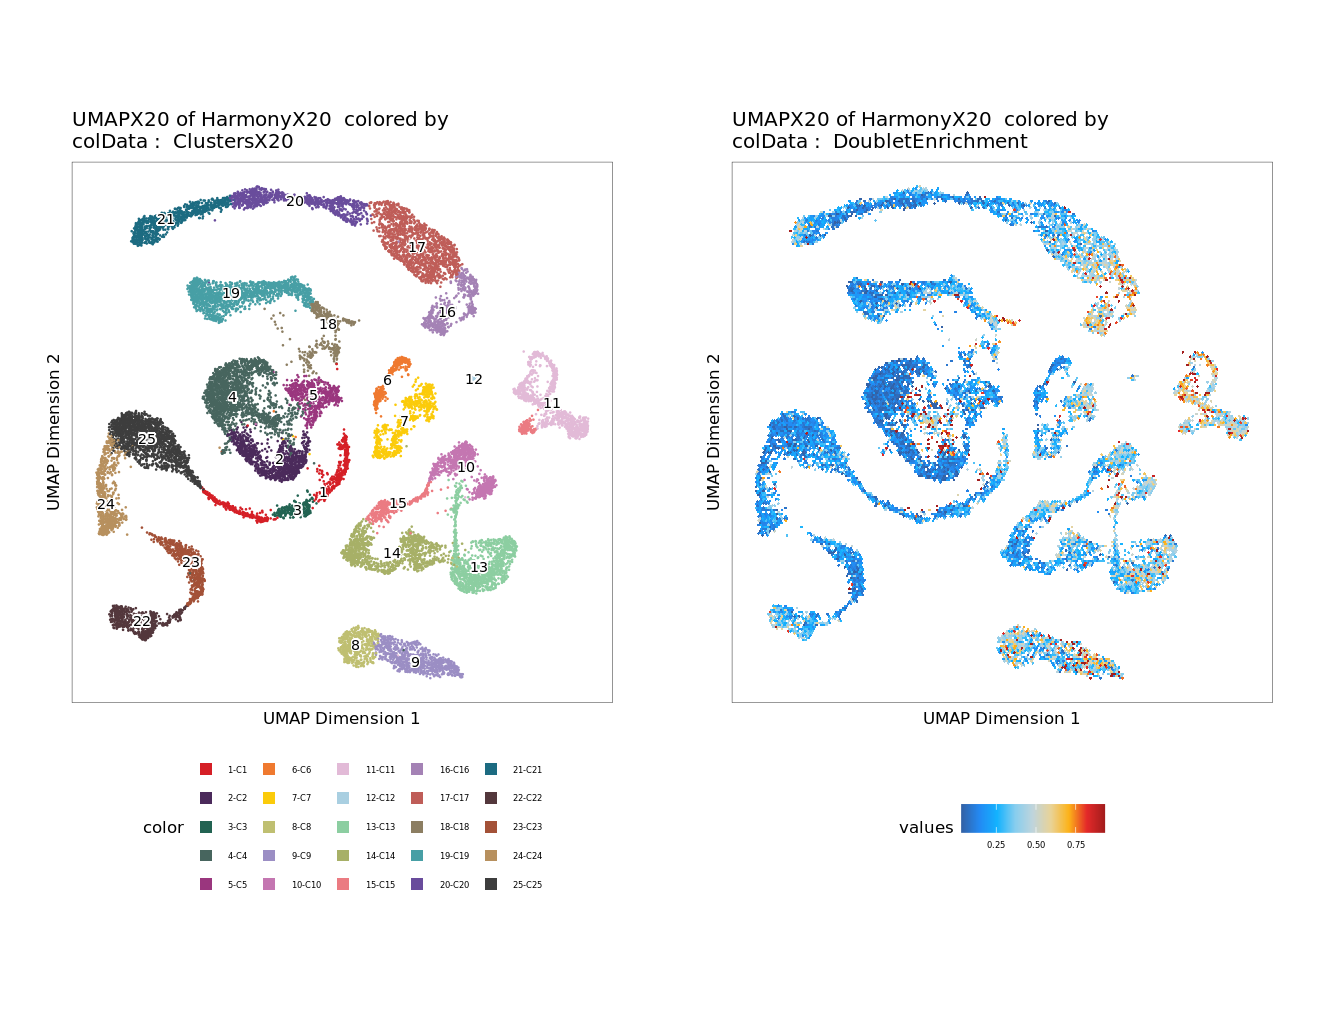

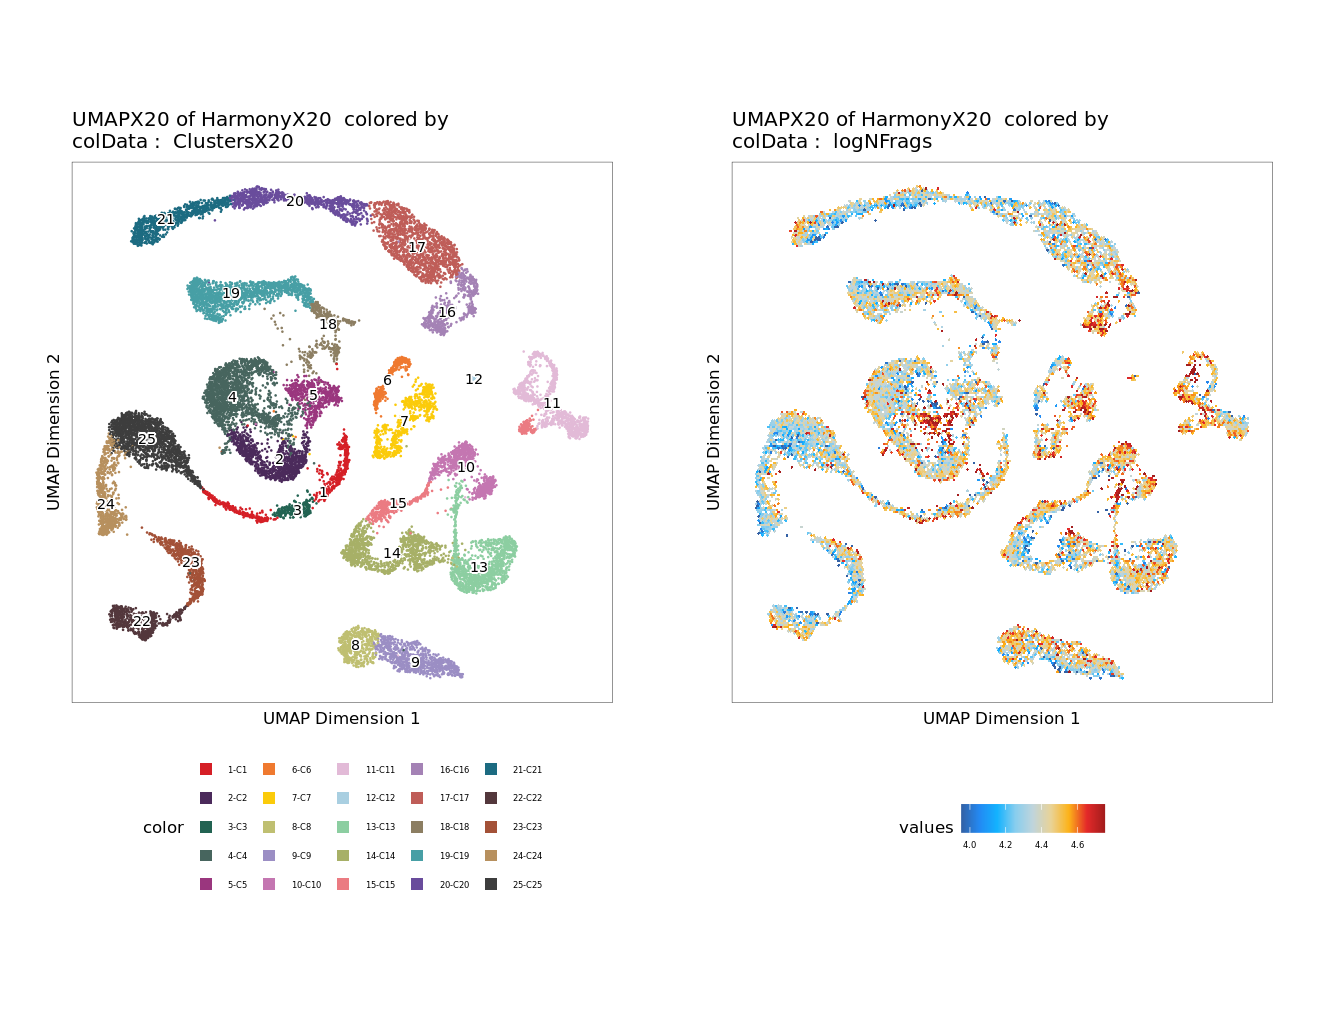

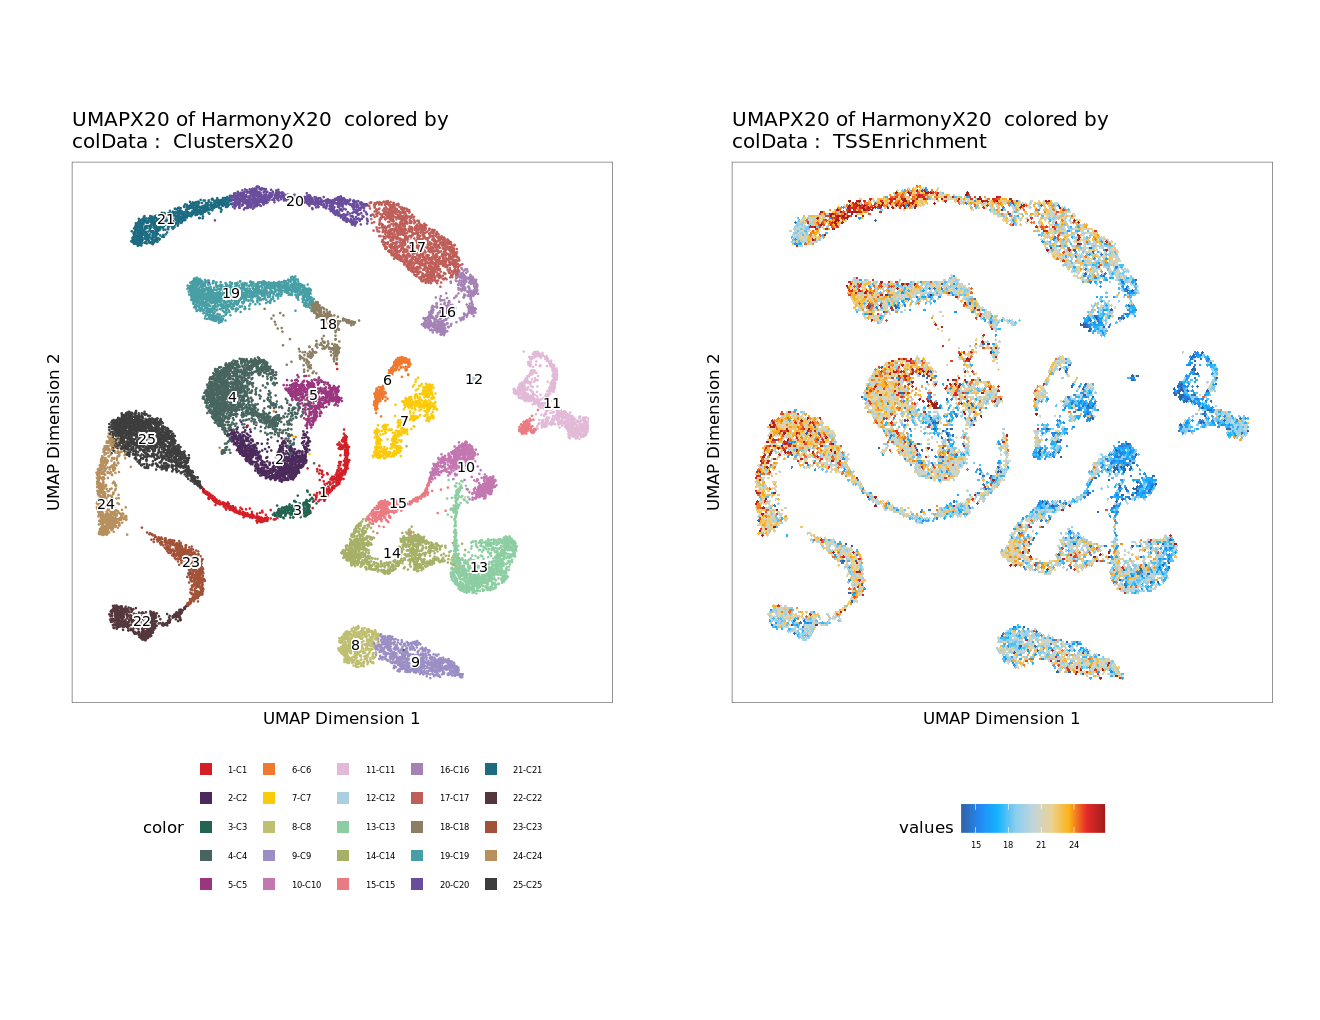

In [5]:
# make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX20", embedding = "UMAPX20")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPX20")
ggAlignPlots(p1, p2, type = "h")


proj$logNFrags = log10(proj$nFrags)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPX20")
p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPX20")
ggAlignPlots(p1, p3, type = "h")
ggAlignPlots(p1, p4, type = "h")




ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3364277d82ea4-Date-2022-10-11_Time-10-45-49.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3364277d82ea4-Date-2022-10-11_Time-10-45-49.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3364241088620-Date-2022-10-11_Time-10-45-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3364241088620-Date-2022-10-11_Time-10-45-51.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3364233d8eee7-Date-2022-10-11_Time-10-45-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to 

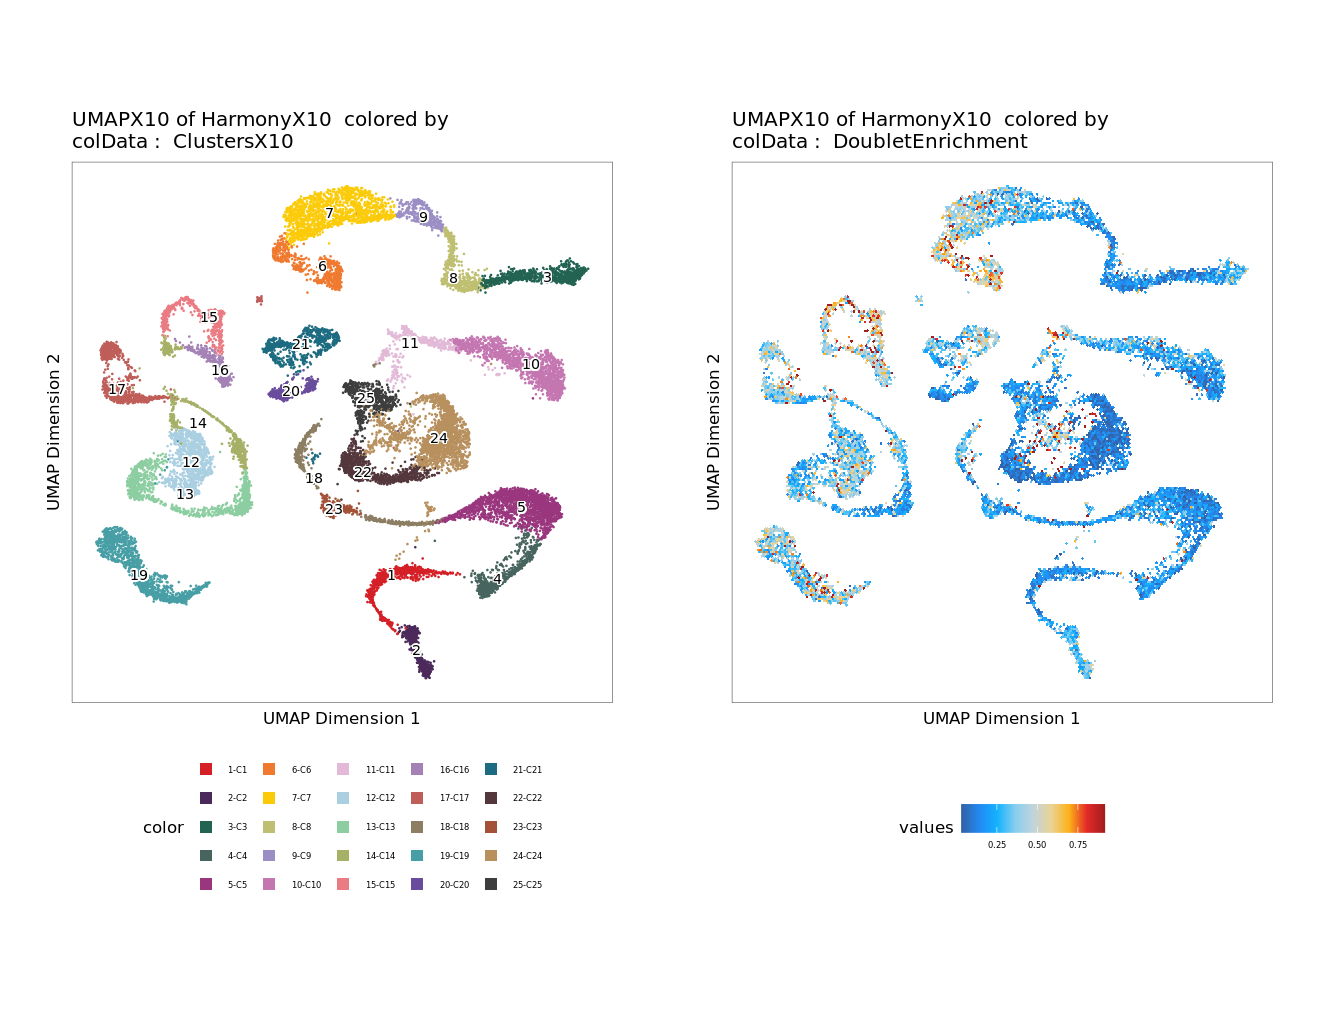

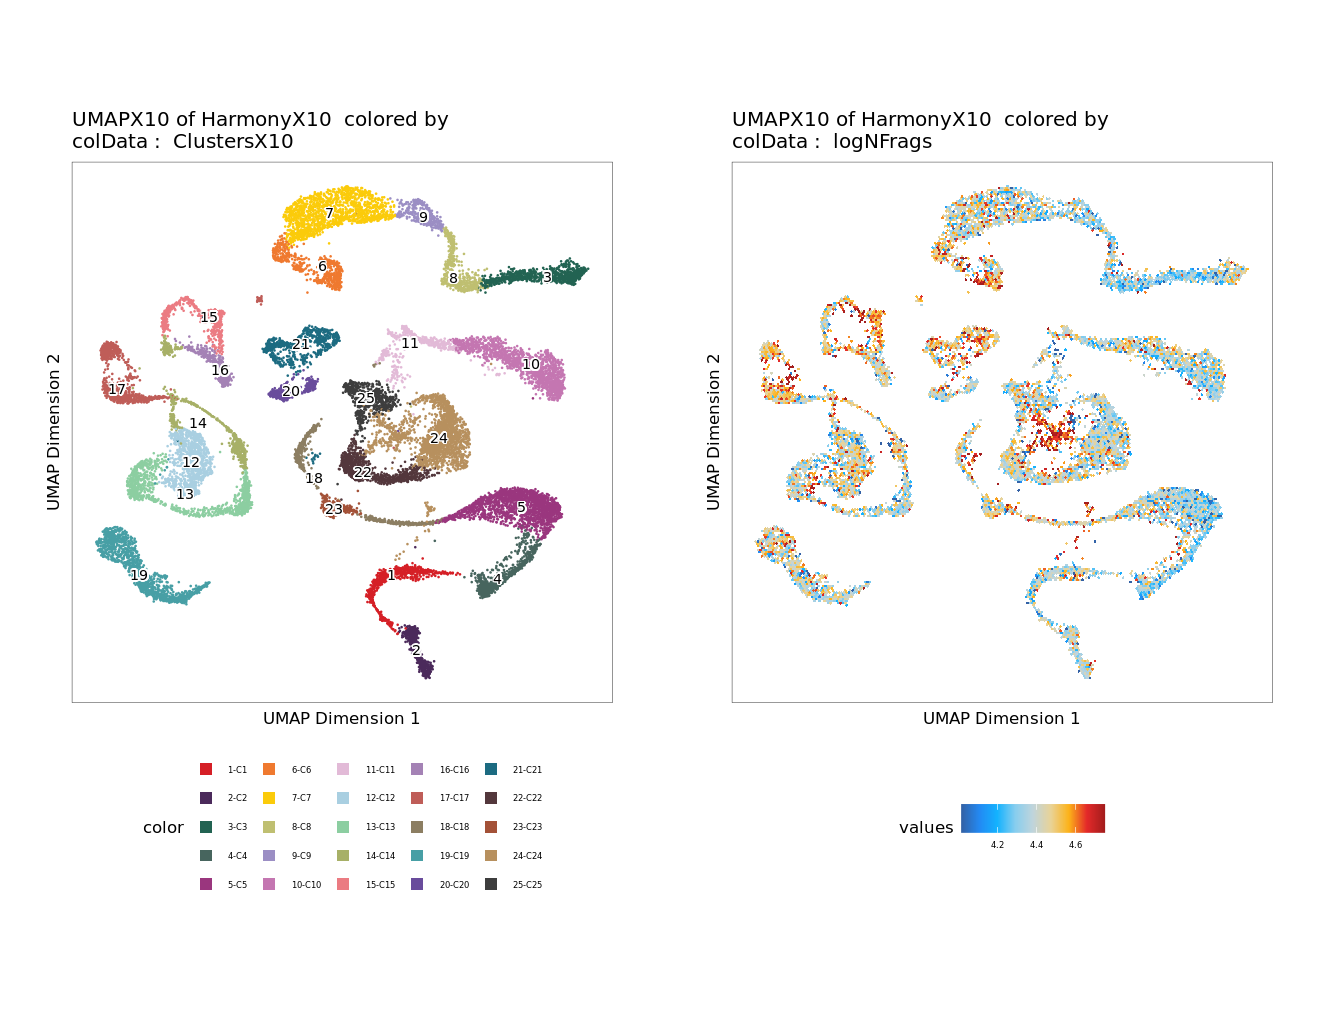

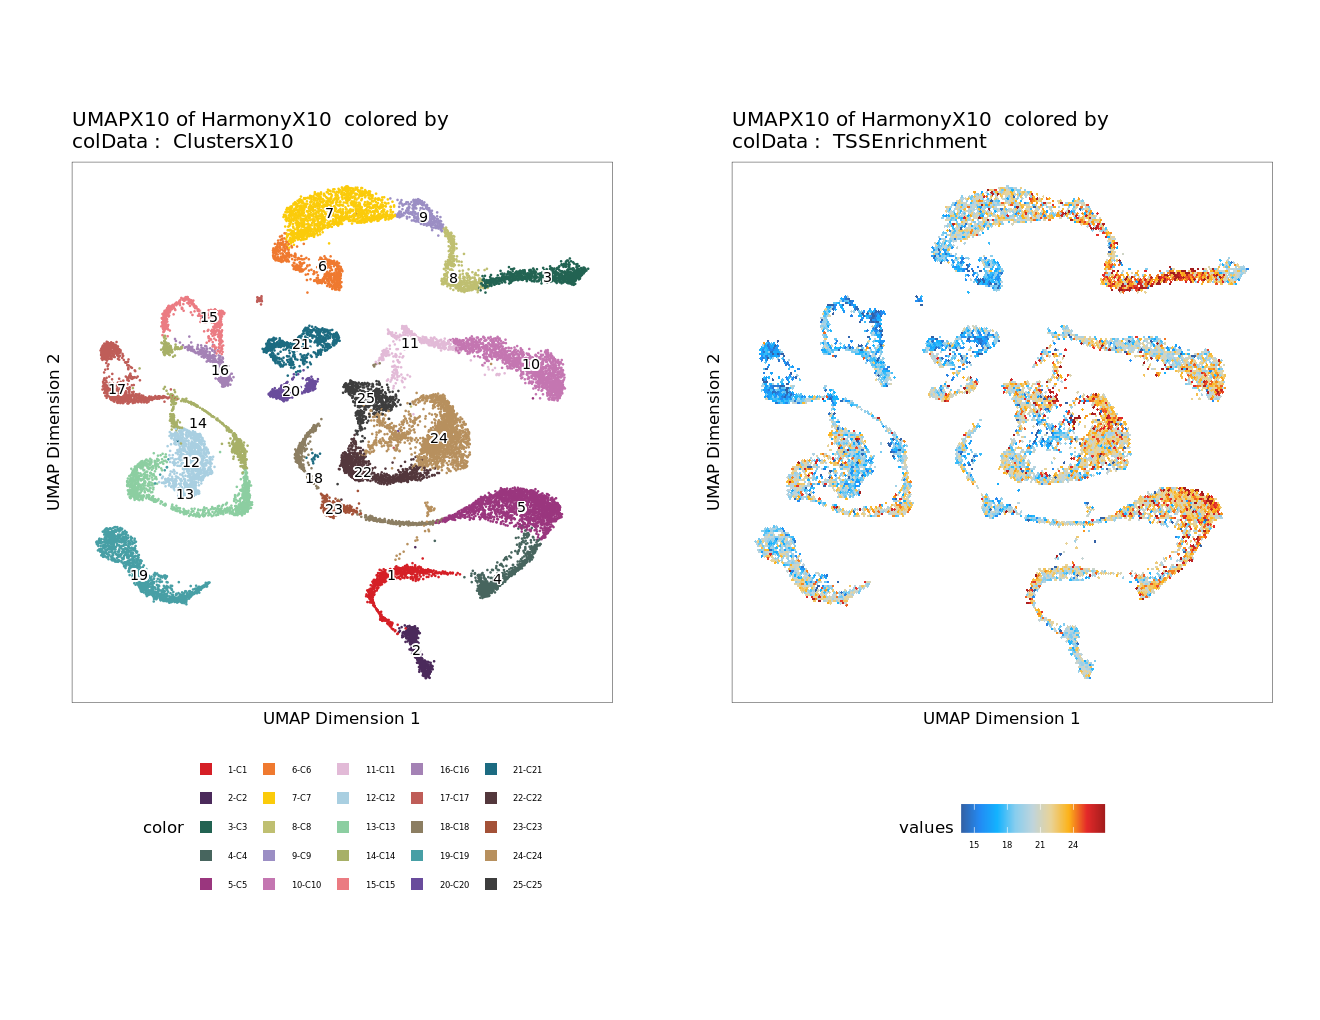

In [6]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX10", embedding = "UMAPX10")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPX10")
ggAlignPlots(p1, p2, type = "h")


proj$logNFrags = log10(proj$nFrags)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPX10")
p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPX10")
ggAlignPlots(p1, p3, type = "h")
ggAlignPlots(p1, p4, type = "h")

# Integrate with snRNA-seq from neuronal cell types

In [6]:
##########################
neuron_data_sce = readRDS("/projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/rdas/macaque_integrated_neuronsv3.mouseGenes.sce.rds")
# neuron_data_sce[[]][1:5,]
# neuron_data_sce$RNA[1:5,1:5]
# index <- neuron_data_sce$cluster_type != "midVen"

# neuron_data_sce <- sce[,index]
# counts actually natural logcounts, undo first, use `counts` as RNA thing to co-cluster
# counts(neuron_data_sce) = 2.718 ^ logcounts(neuron_data_sce) - 1 
#logcounts(neuron_data_sce) = NULL # so only 1 assay available

# has cluster_type data
table(neuron_data_sce$cluster_type)


  GLUT1   GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  GLUT10 
    142     222     152      49     105     123     124      76      98      62 
 GLUT11   GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5  midVen 
     89     109      65      71      74      91     100     202     744 

In [2]:
head(colData(neuron_data_sce))
table(colData(neuron_data_sce)$cell_type)
table(colData(neuron_data_sce)$cluster_type)


DataFrame with 6 rows and 23 columns
           Barcode Unnamed..0
          <factor>  <integer>
1 AAACCCAAGGATACGC          1
2 AAACCCAAGTAGGTTA          2
4 AAACGAAAGGTGATAT          4
5 AAACGAAGTACCAATC          5
7 AAACGAAGTCCTACGG          7
8 AAACGAAGTTGGGATG          8
                                                                                              Sample
                                                                                            <factor>
1 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
2 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
4 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
5 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
7 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
8 /projects/pfen


 GLUT1  GLUT2  GLUT3  GLUT4  GLUT5  GLUT6  GLUT7  GLUT8  GLUT9 GLUT10 GLUT11 
   142    222    152     49    105    123    124     76     98     62     89 
 GABA1  GABA2  GABA3  GABA4  GABA5 midVen 
   109    136     74    191    202    744 


  GLUT1   GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  GLUT10 
    142     222     152      49     105     123     124      76      98      62 
 GLUT11   GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5  midVen 
     89     109      65      71      74      91     100     202     744 

In [7]:
#####################################
#integration split by tissue region 
proj = addGeneIntegrationMatrix(
  ArchRProj = proj, 
  useMatrix = "GeneScoreMatrix", 
  matrixName = "GeneIntegrationMatrix1", 
  reducedDims = "HarmonyX10", 
  seRNA = neuron_data_sce, nGenes = 2000, 
  addToArrow = TRUE, plotUMAP = TRUE, 
  groupRNA = "cluster_type", 
  nameCell = "predictedCell_clustertype", 
  nameGroup = "predictedGroup_RNA2ATAC_clustertype", 
  nameScore = "predictedScore_RNA2ATAC_clustertype",
  force = TRUE)

proj = saveArchRProject(ArchRProj = proj)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-6a1e54ee9c6f2-Date-2023-01-31_Time-19-04-56.log
If there is an issue, please report to github with logFile!

2023-01-31 19:04:59 : Running Seurat's Integration Stuart* et al 2019, 0.054 mins elapsed.

2023-01-31 19:05:01 : Checking ATAC Input, 0.092 mins elapsed.

2023-01-31 19:05:51 : Checking RNA Input, 0.919 mins elapsed.

2023-01-31 19:05:57 : Found 15939 overlapping gene names from gene scores and rna matrix!, 1.02 mins elapsed.

2023-01-31 19:05:59 : Creating Integration Blocks, 1.051 mins elapsed.

2023-01-31 19:05:59 : Prepping Interation Data, 1.052 mins elapsed.

2023-01-31 19:06:00 : Computing Integration in 2 Integration Blocks!, 0 mins elapsed.

2023-01-31 19:13:26 : Block (1 of 2) : Plotting Joint UMAP, 7.43 mins elapsed.



2023-01-31 19:14:04 : Block (2 of 2) : Plotting Joint UMAP, 8.07 mins elapsed.



2023-01-31 19:14:48 : Transferring Data to ArrowFiles, 8.79 mins elapsed.

2023-01-31 19:27:54 : Completed In

In [1]:
getCellColData(proj)

ERROR: Error in getCellColData(proj): could not find function "getCellColData"


# Compare snATAC clusters w/ snRNA clusters

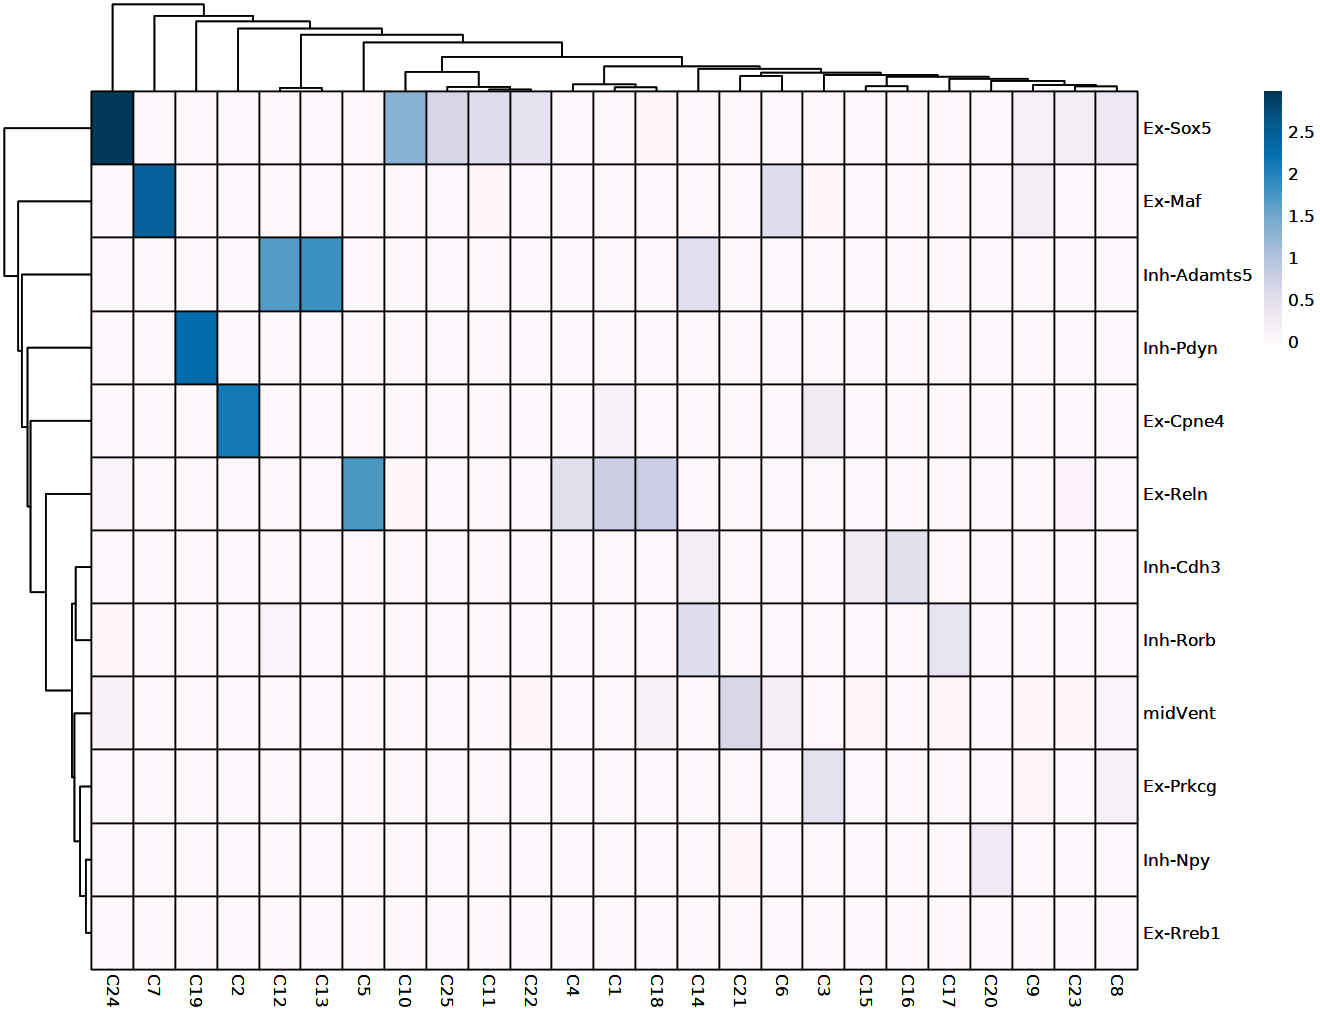

In [13]:
cM <- confusionMatrix(paste0(proj$predictedGroup_RNA2ATACCo), paste0(proj$ClustersX10))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

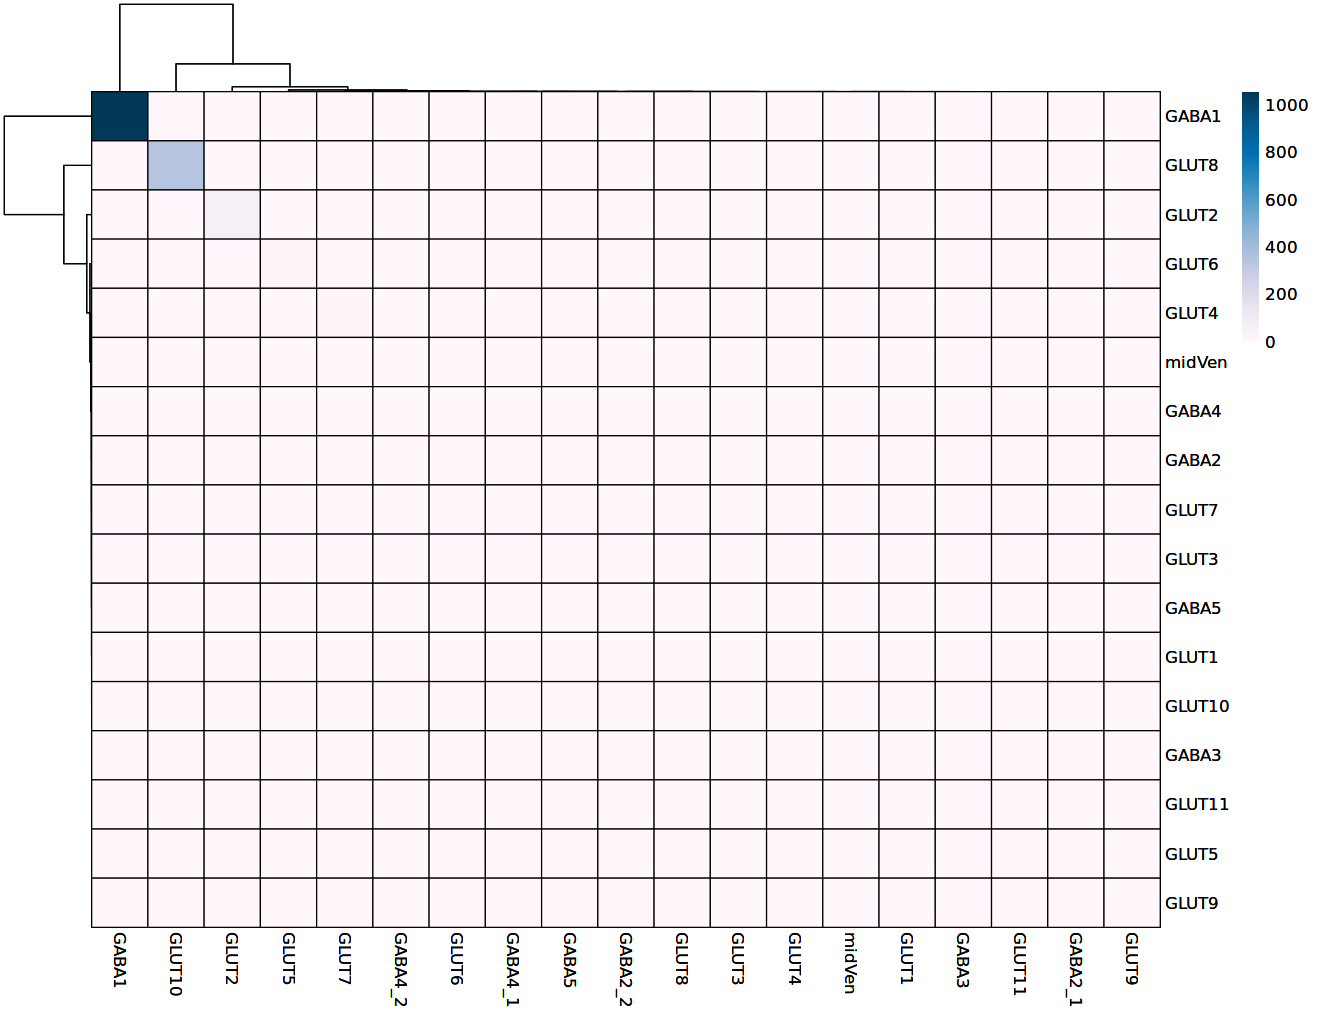

In [56]:
cM <- confusionMatrix(paste0(proj$predictedGroup_RNA2ATACCo_cell), paste0(proj$predictedGroup_RNA2ATAC_clustertype))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a1e520ed92de-Date-2023-01-31_Time-20-48-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a1e520ed92de-Date-2023-01-31_Time-20-48-41.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a1e53409a3dc-Date-2023-01-31_Time-20-49-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a1e53409a3dc-Date-2023-01-31_Time-20-49-18.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a1e553d05c05-Date-2023-01-31_Time-20-49-24.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

Length of unique values greater than palette, interpolating..



ArchR logging successful t

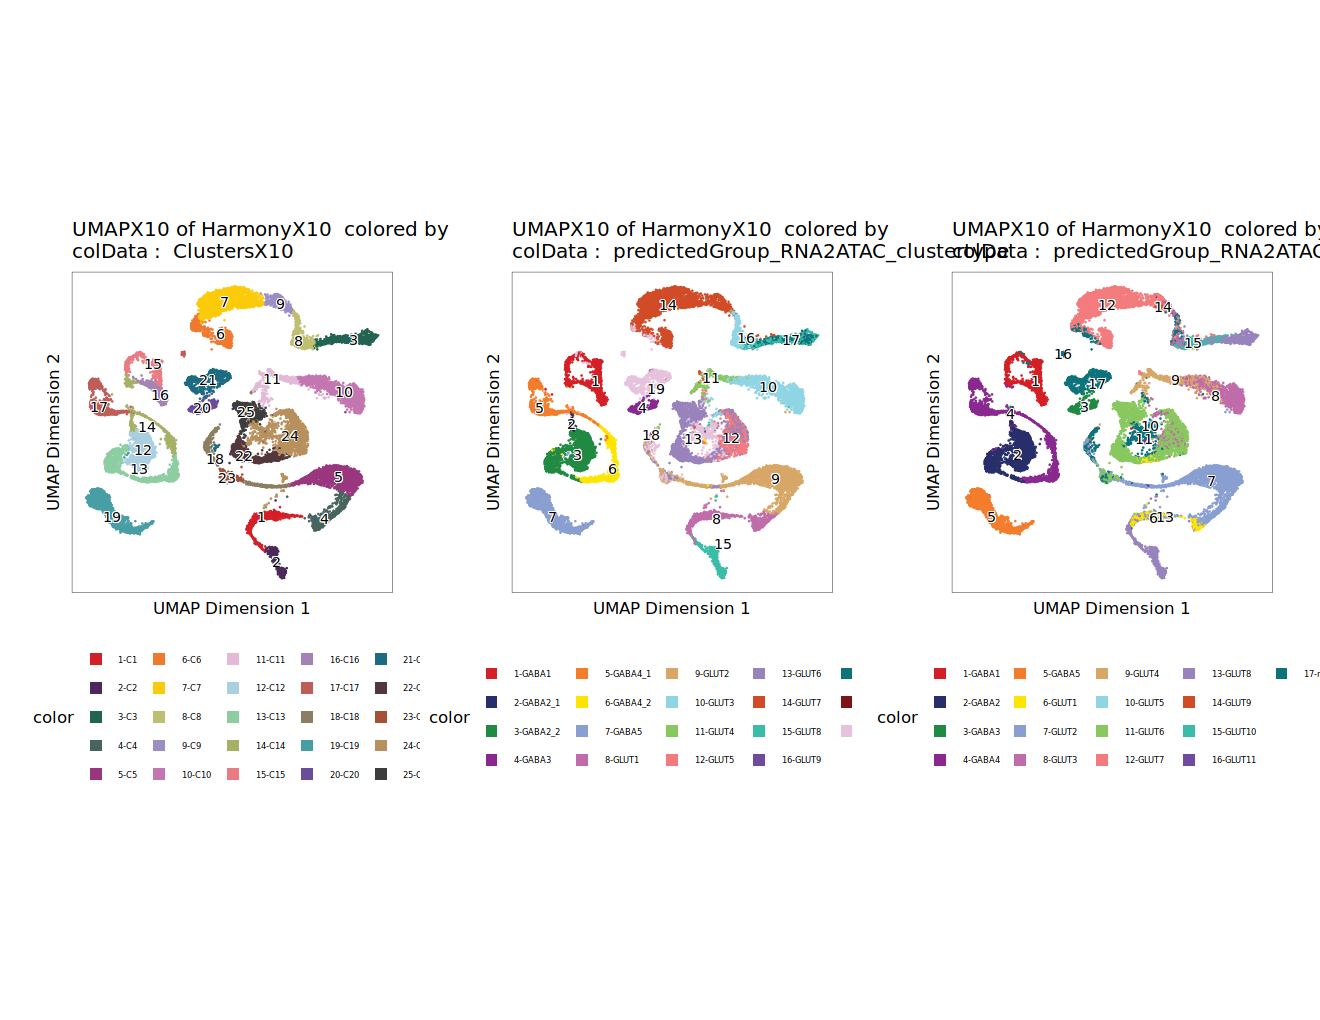

In [59]:
p1 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo_cell", embedding = "UMAPX10")
p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATAC_clustertype", embedding = "UMAPX10")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "ClustersX10", embedding = "UMAPX10")

ggAlignPlots(p3, p2, p1, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-336422b6c1765-Date-2022-10-11_Time-10-48-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-11 10:48:46 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


Imputing Matrix

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-336422b6c1765-Date-2022-10-11_Time-10-48-45.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<s

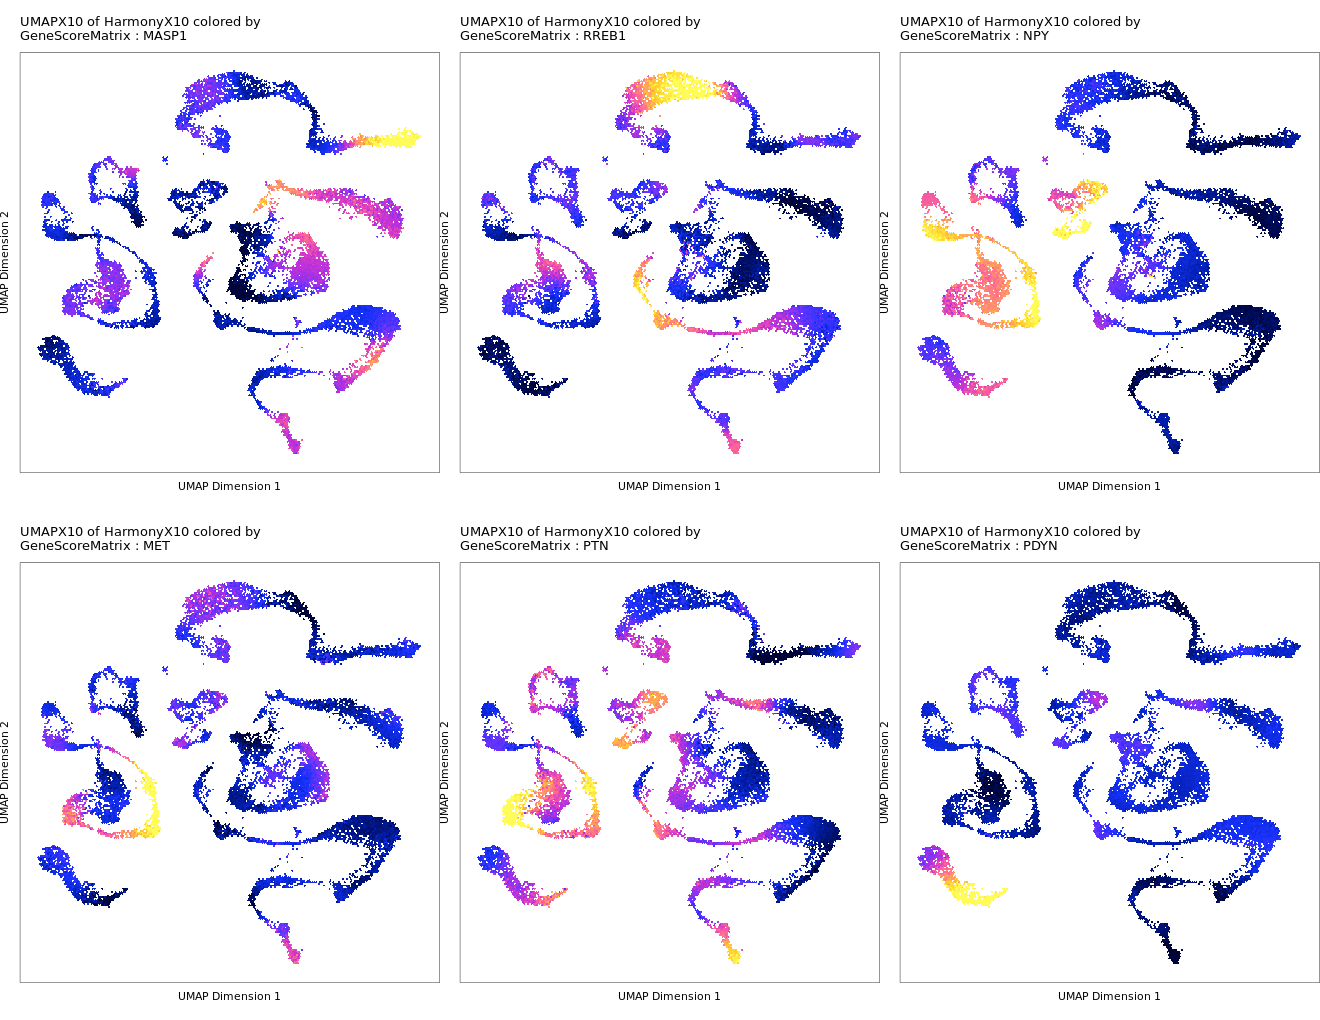

In [9]:
## Marker Genes for differentiation of Inhibitory Nuerons
markerGenes1  <- c('MASP1', # GABA 1
#                    'GDNF-AS1', # GABA 2
                   'RREB1', # GABA 2
                   'NPY', # GABA 3
                   'MET', # GABA 4
                   'PTN', # GABA 4
                   'PDYN' # GABA 5
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX10")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))




Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-336425e10ad8c-Date-2022-10-11_Time-10-50-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-11 10:50:04 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


Imputing Matrix

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-336425e10ad8c-Date-2022-10-11_Time-10-50-02.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `gui

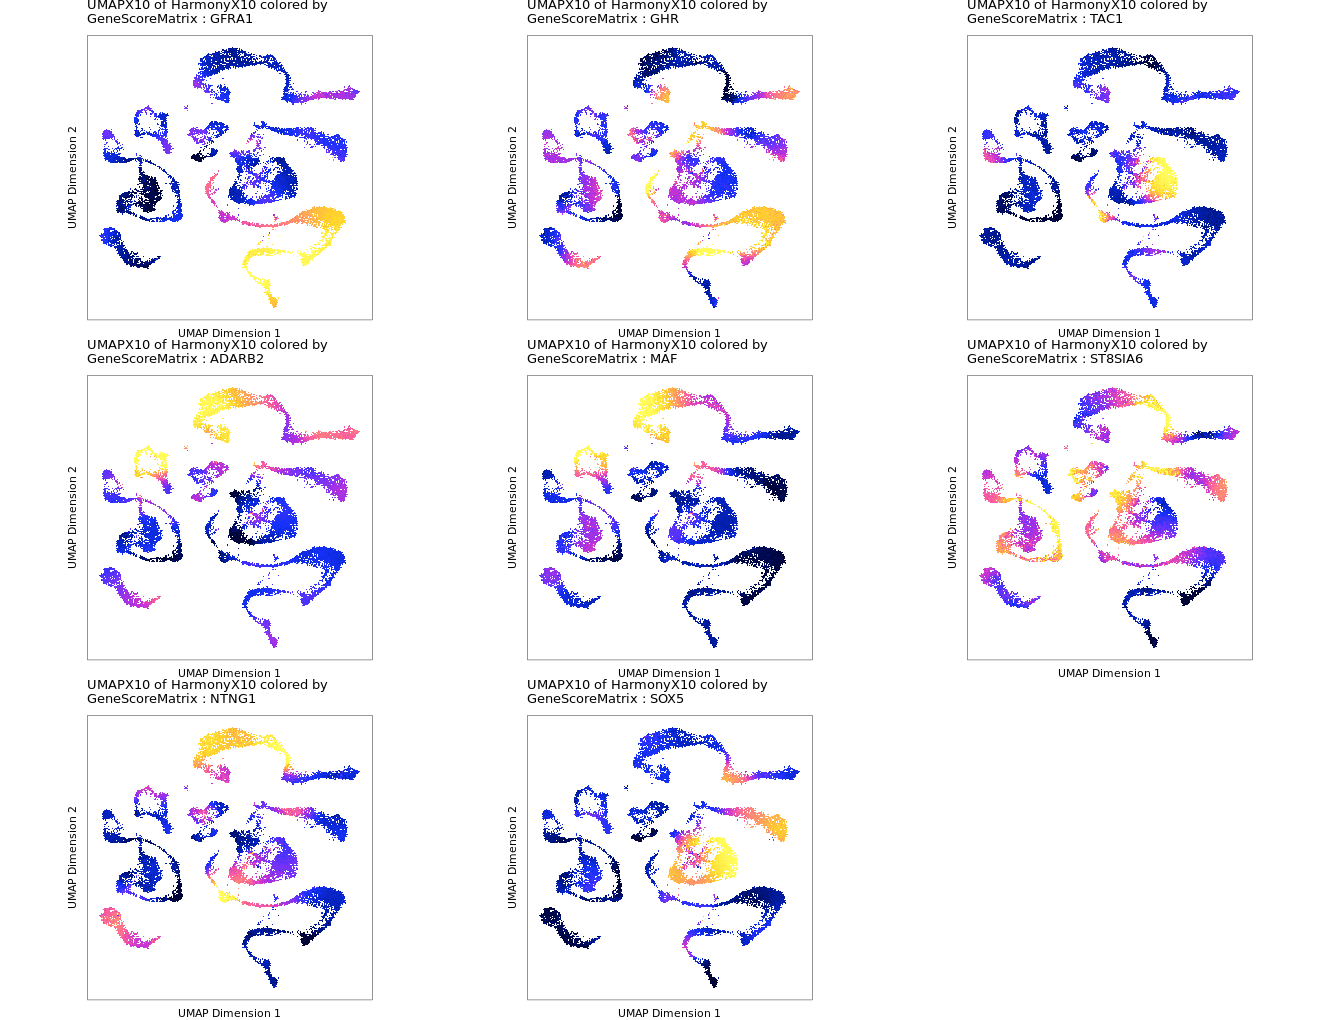

In [10]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('GFRA1', #GLUT 1,2
#                    'TAC3', #GLUT 3,4
                   'GHR', #GLUT 5,6
                   'TAC1', #GLUT 6
                   'ADARB2', #GLUT 7-10 
                   'MAF', #GLUT 7
                   'ST8SIA6', #GLUT 8
                   'NTNG1', #GLUT 9,10
                   'SOX5' #GLUT6,6?
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX10")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-336423f0333f-Date-2022-10-11_Time-10-51-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-11 10:51:24 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


Imputing Matrix

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-336423f0333f-Date-2022-10-11_Time-10-51-22.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guide

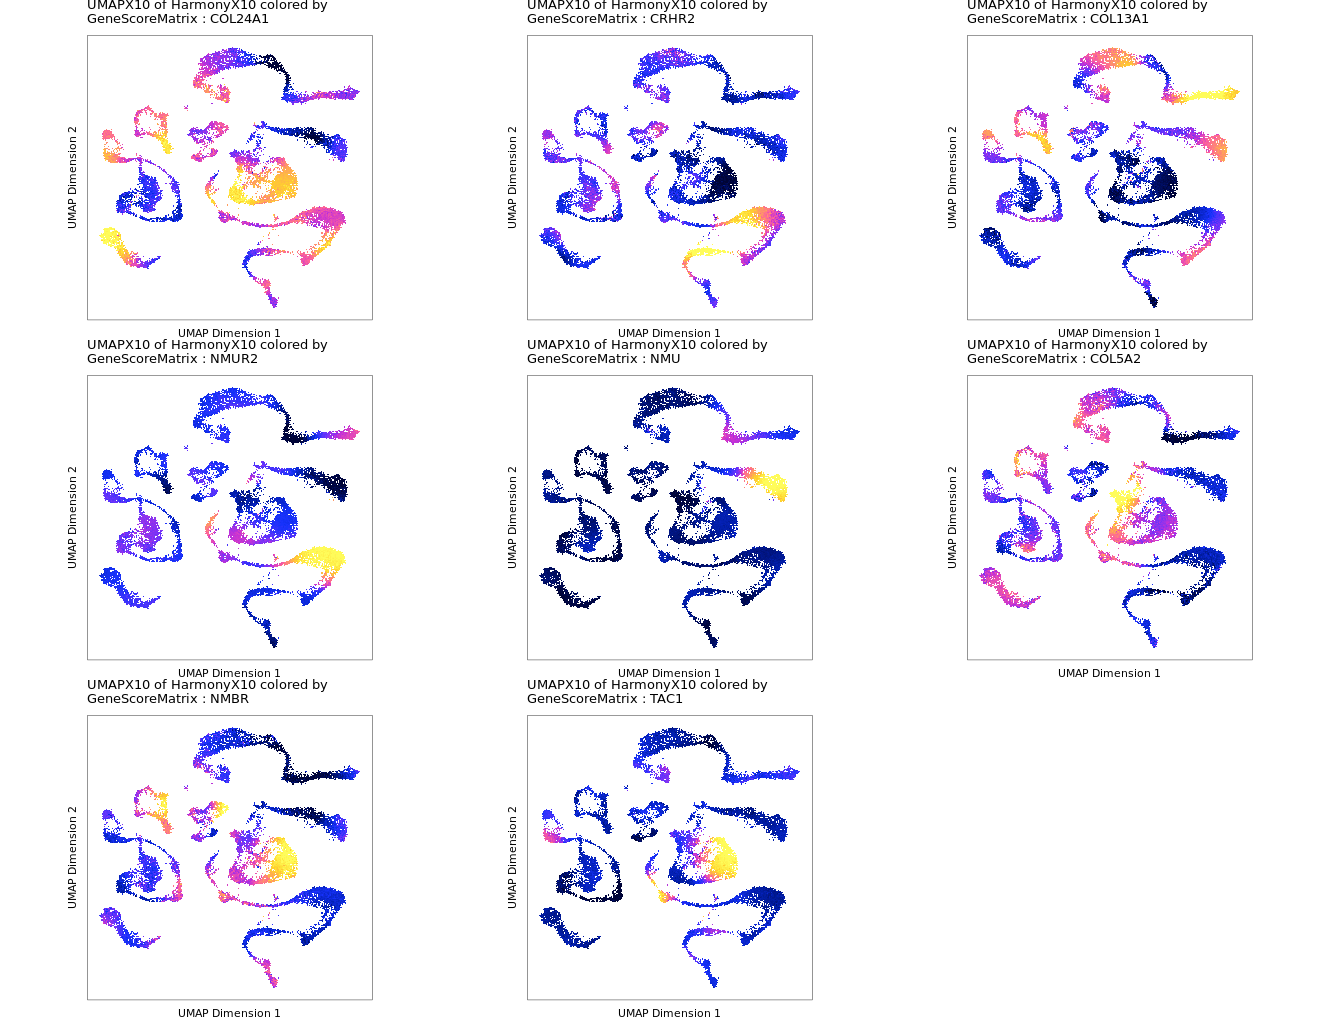

In [11]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('COL24A1', #GLUT 5
                   'CRHR2', #GLUT 1
                   'COL13A1', #GLUT 1
                   'NMUR2', #GLUT 2
                   'NMU', #GLUT 3
                   'COL5A2', #GLUT 4
                   'NMBR', #GLUT 5
                   'TAC1' #GLUT 6
#                    'ANOS1' #GLUT 6
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX10")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [14]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('COL21A1', #GLUT 7
                   'MAF', #GLUT 7
                   'MAFA', #GLUT 8
                   'ADAMTS16', #GLUT 9
                   'TLL2', #GLUT 9
                   'OTOGL', #GLUT 10
                   'PDYN' #GLUT 11
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX10")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3364272610c0c-Date-2022-10-11_Time-10-54-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-11 10:54:37 : 

FeatureName (COL21A1) does not exist! See getFeatures



ERROR: Error: 



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-42341bd3684d-Date-2023-02-15_Time-10-23-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-42341bd3684d-Date-2023-02-15_Time-10-23-58.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-42341f695b9d-Date-2023-02-15_Time-10-24-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-42341f695b9d-Date-2023-02-15_Time-10-24-00.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4234150d9f18-Date-2023-02-15_Time-10-24-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4234150d9f18-Date-2023-02-15_Time-

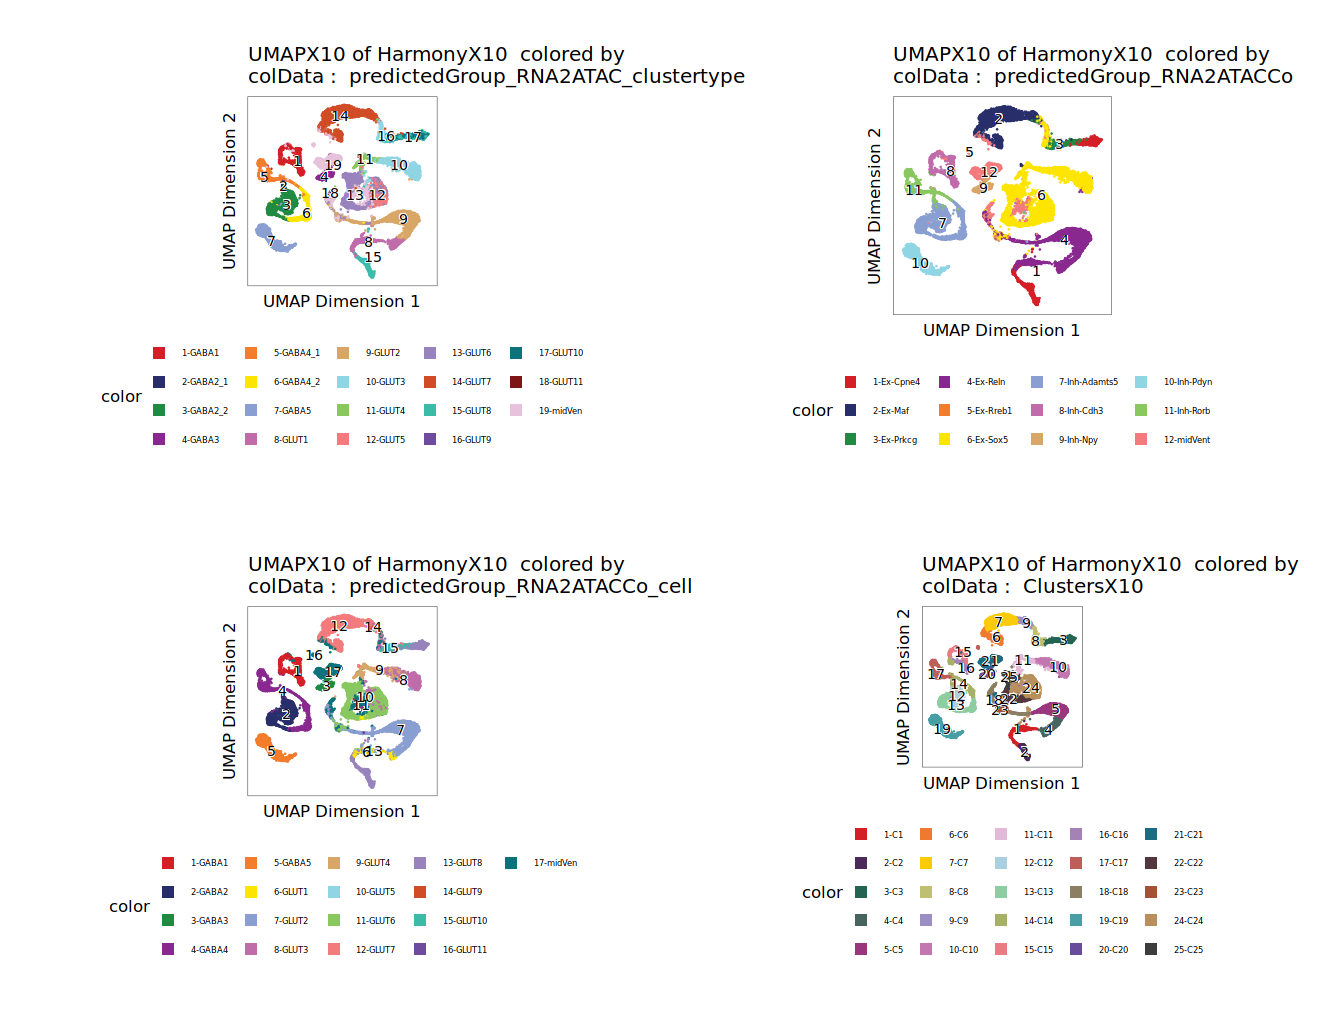

In [7]:
p1 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATAC_clustertype", embedding = "UMAPX10")
p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX10")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo_cell", embedding = "UMAPX10")
p4 <- plotEmbedding( proj, colorBy = "cellColData", name = "ClustersX10", embedding = "UMAPX10")

plot_grid(p1, p2, p3, p4)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4234473d20f2-Date-2023-02-15_Time-10-24-17.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4234473d20f2-Date-2023-02-15_Time-10-24-17.log



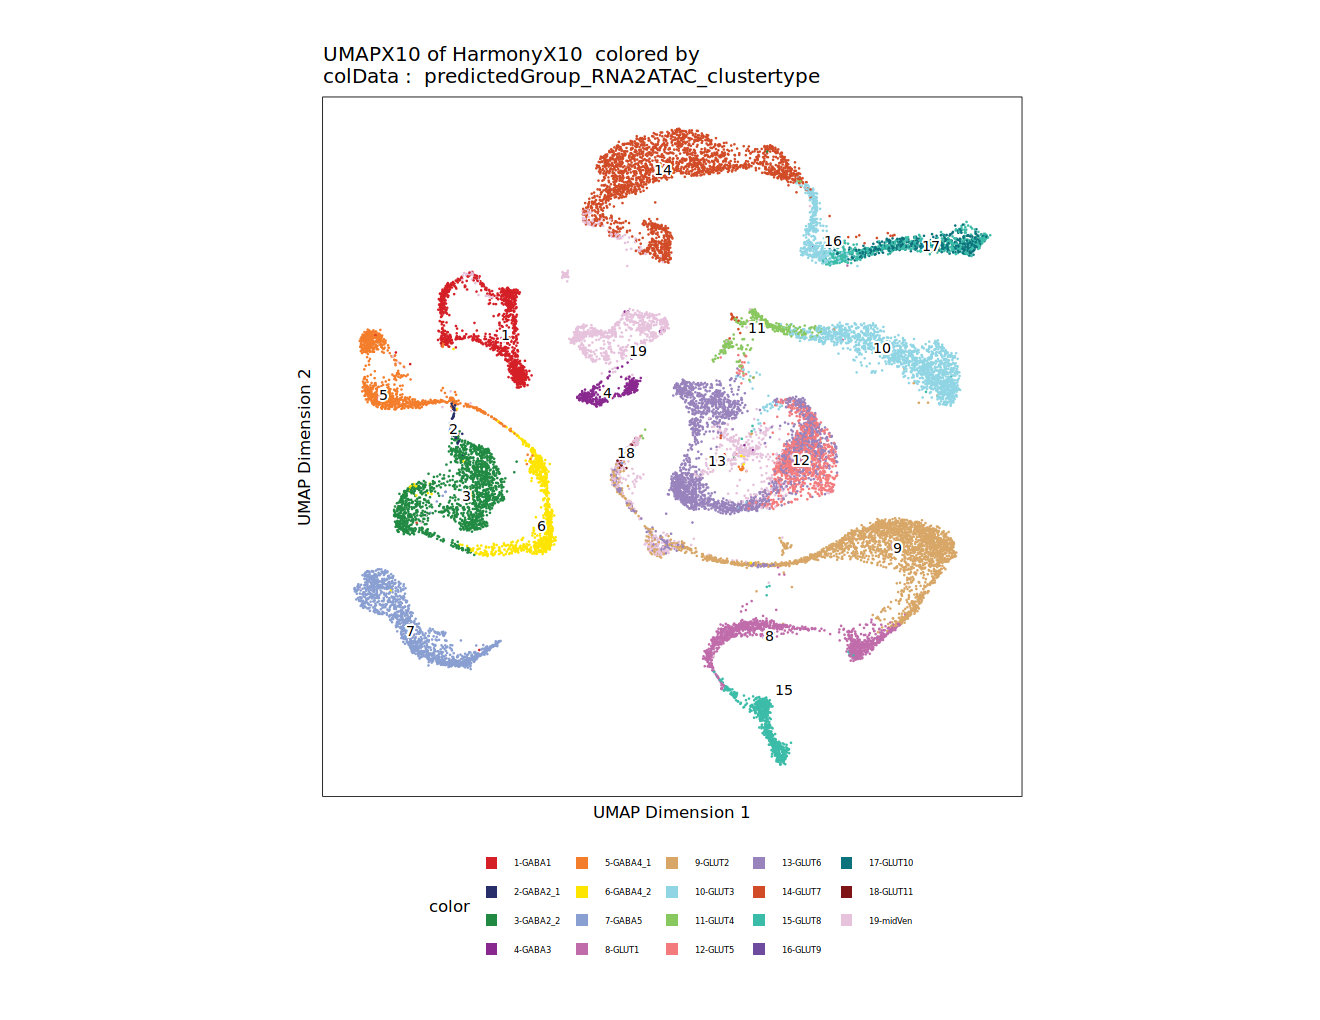

In [8]:
#final cluster w/ RNA labels embedding
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATAC_clustertype", embedding = "UMAPX10")
p3


In [15]:
# drop the UNK cluster
idxSample <- BiocGenerics::which(proj$predictedGroup_RNA2ATACCo %ni% c('Drop'))
table(proj$predictedGroup_RNA2ATACCo[idxSample])
cellsSample <- proj$cellNames[idxSample]
proj = subsetCells(ArchRProj = proj, cellNames = cellsSample)
proj = saveArchRProject(ArchRProj = proj)

character(0)

In [9]:
#add FINAL LABELS column to all projects
proj <- addCellColData(ArchRProj = proj, data = proj$predictedGroup_RNA2ATAC_clustertype,
    cells = rownames(getCellColData(proj)), name = "FINAL_GROUP_LABEL", force = TRUE)
names(getCellColData(proj))
getCellColData(proj)

[1] "Sample"                              "TSSEnrichment"                      
 [3] "ReadsInTSS"                          "ReadsInPromoter"                    
 [5] "ReadsInBlacklist"                    "PromoterRatio"                      
 [7] "PassQC"                              "NucleosomeRatio"                    
 [9] "nMultiFrags"                         "nMonoFrags"                         
[11] "nFrags"                              "nDiFrags"                           
[13] "DoubletScore"                        "DoubletEnrichment"                  
[15] "BlacklistRatio"                      "Sample_ID"                          
[17] "Date.nuclei.prep"                    "Biological.rep"                     
[19] "Age"                                 "Sex"                                
[21] "Species"                             "Region"                             
[23] "ClustersI200"                        "ClustersH200"                       
[25] "logNFrags"                           "Celltype1"                          
[27] "ClustersX60"                         "predictedCell_Co"                   
[29] "predictedGroup_RNA2ATACCo"           "predictedScore_RNA2ATACCo"          
[31] "ClustersX20"                         "ClustersX10"                        
[33] "predictedCell_Co_cell"               "predictedGroup_RNA2ATACCo_cell"     
[35] "predictedScore_RNA2ATACCo_cell"      "Neuron_Type"                        
[37] "predictedCell_clustertype"           "predictedGroup_RNA2ATAC_clustertype"
[39] "predictedScore_RNA2ATAC_clustertype" "FINAL_GROUP_LABEL"

DataFrame with 20591 rows and 40 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GCTTTAGGATCGTAAC Mouse_DH_SEA2253A58        18.201
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACCCATCTTAGCAGG Mouse_DH_SEA2253A69         8.303
Mouse_DH_SEA2253A69#GACAGGAACTTCTGAG Mouse_DH_SEA2253A69         9.596
Mouse_DH_SEA2253A69#CTACGTGCTAGGTCCC Mouse_DH_SEA2253A69        50.724
Mouse_DH_SEA2253A69#ATGTTTCACGCCGTTG Mouse_DH_SEA2253A69        31.498
Mouse_DH_SEA2253A69#GCGTCGATGGTTGACT Mouse_DH_SEA2253A69        30.471
                                    

In [11]:
#validate FINAL labels
table(proj$predictedGroup_RNA2ATAC_clustertype)
table(proj$FINAL_GROUP_LABEL)
proj = saveArchRProject(ArchRProj = proj)


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   1078      64    1545     376     967     795    1320    1092     431      39 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  midVen 
   2452    1945     341     992    2195    2283    1157       1    1518 


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   1078      64    1545     376     967     795    1320    1092     431      39 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  midVen 
   2452    1945     341     992    2195    2283    1157       1    1518 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         